In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

import pickle
import os

# problem statement

In [ ]:
predicting the customers who can sign the term deposit agreement with the bank

# data gathering

In [6]:
df=pd.read_csv("bank.csv")
df

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,58,"""management""","""married""","""tertiary""","""no""",2143,"""yes""","""no""","""unknown""",5,"""may""",261,1,-1,0,"""unknown""","""no"""
1,1,44,"""technician""","""single""","""secondary""","""no""",29,"""yes""","""no""","""unknown""",5,"""may""",151,1,-1,0,"""unknown""","""no"""
2,2,33,"""entrepreneur""","""married""","""secondary""","""no""",2,"""yes""","""yes""","""unknown""",5,"""may""",76,1,-1,0,"""unknown""","""no"""
3,3,47,"""blue-collar""","""married""","""unknown""","""no""",1506,"""yes""","""no""","""unknown""",5,"""may""",92,1,-1,0,"""unknown""","""no"""
4,4,33,"""unknown""","""single""","""unknown""","""no""",1,"""no""","""no""","""unknown""",5,"""may""",198,1,-1,0,"""unknown""","""no"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45206,51,"""technician""","""married""","""tertiary""","""no""",825,"""no""","""no""","""cellular""",17,"""nov""",977,3,-1,0,"""unknown""","""yes"""
45207,45207,71,"""retired""","""divorced""","""primary""","""no""",1729,"""no""","""no""","""cellular""",17,"""nov""",456,2,-1,0,"""unknown""","""yes"""
45208,45208,72,"""retired""","""married""","""secondary""","""no""",5715,"""no""","""no""","""cellular""",17,"""nov""",1127,5,184,3,"""success""","""yes"""
45209,45209,57,"""blue-collar""","""married""","""secondary""","""no""",668,"""no""","""no""","""telephone""",17,"""nov""",508,4,-1,0,"""unknown""","""no"""


In [7]:
df.columns

Index(['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [8]:
df=df.drop("Unnamed: 0",axis=1)

In [9]:
df.shape

(45211, 17)

In [10]:
df.isna().mean()*100

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64

In [11]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# EDA

<AxesSubplot:xlabel='age', ylabel='job'>

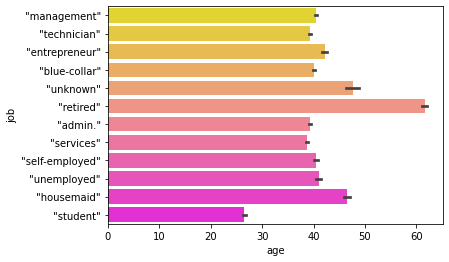

In [13]:
sns.barplot(x=df.age,y=df.job,data=df,palette="spring_r")

#now we know that what is the profession of people in a particualr range of age

#if age is under 30 then the he/she is a student
# if age is greter than 50  then the he/she is a retired person.

<AxesSubplot:xlabel='education', ylabel='age'>

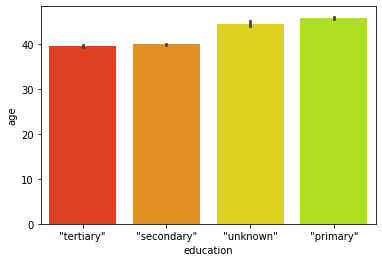

In [14]:
sns.barplot(x=df.education,y=df.age,data=df,palette="prism")

#most of the people only completed there primary education and all of them's age is above 40

<AxesSubplot:xlabel='y', ylabel='age'>

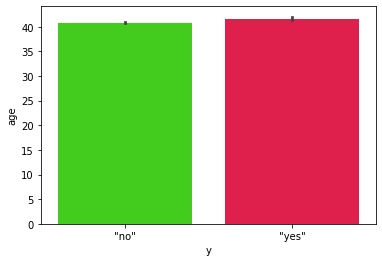

In [15]:
sns.barplot(x=df.y,y=df.age,data=df,palette="prism")


# df["age"]

In [16]:
df.age.nunique()

77

<AxesSubplot:xlabel='age'>

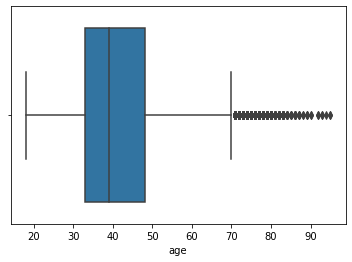

In [17]:
sns.boxplot(df.age)

In [18]:
# here we are going to use iqr upper tail value to handle the outliers
q1=df.age.quantile(q=0.25)
q3=df.age.quantile(q=0.75)
iqr=q3-q1
lowertail=q1-1.5*iqr
uppertail=q3+1.5*iqr

In [19]:
def hand_out(data):
    if data>uppertail:
        return uppertail
    else:
        return data

In [20]:
df.age=df.age.apply(hand_out)
df.age

0        58.0
1        44.0
2        33.0
3        47.0
4        33.0
         ... 
45206    51.0
45207    70.5
45208    70.5
45209    57.0
45210    37.0
Name: age, Length: 45211, dtype: float64

<AxesSubplot:xlabel='age'>

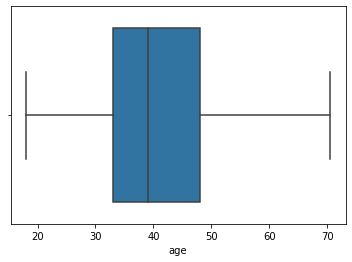

In [21]:
sns.boxplot(df.age)

# df["job"]

In [22]:
df.job.unique()

array(['"management"', '"technician"', '"entrepreneur"', '"blue-collar"',
       '"unknown"', '"retired"', '"admin."', '"services"',
       '"self-employed"', '"unemployed"', '"housemaid"', '"student"'],
      dtype=object)

In [23]:
df.job.nunique()

12

In [24]:
df.job.value_counts()

"blue-collar"      9732
"management"       9458
"technician"       7597
"admin."           5171
"services"         4154
"retired"          2264
"self-employed"    1579
"entrepreneur"     1487
"unemployed"       1303
"housemaid"        1240
"student"           938
"unknown"           288
Name: job, dtype: int64

In [25]:
df_job=pd.get_dummies(df.job,prefix="job")
df_job

,"job_""admin.""","job_""blue-collar""","job_""entrepreneur""","job_""housemaid""","job_""management""","job_""retired""","job_""self-employed""","job_""services""","job_""student""","job_""technician""","job_""unemployed""","job_""unknown"""
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,0,0,0,0,0,0,0,0,1,0,0
45207,0,0,0,0,0,1,0,0,0,0,0,0
45208,0,0,0,0,0,1,0,0,0,0,0,0
45209,0,1,0,0,0,0,0,0,0,0,0,0


# df["marital"]

In [26]:
df["marital"].unique()

array(['"married"', '"single"', '"divorced"'], dtype=object)

In [27]:
df["marital"].value_counts().to_dict()

{'"married"': 27214, '"single"': 12790, '"divorced"': 5207}

In [28]:
df["marital"].replace({'"married"': 1, '"single"': 0, '"divorced"':2},inplace=True)
df["marital"]

0        1
1        0
2        1
3        1
4        0
        ..
45206    1
45207    2
45208    1
45209    1
45210    1
Name: marital, Length: 45211, dtype: int64

# df["education"]

In [29]:
df["education"].unique()

array(['"tertiary"', '"secondary"', '"unknown"', '"primary"'],
      dtype=object)

In [30]:
df["education"].value_counts().to_dict()

{'"secondary"': 23202,
 '"tertiary"': 13301,
 '"primary"': 6851,
 '"unknown"': 1857}

In [31]:
df["education"].replace({'"secondary"':2,
 '"tertiary"':3,
 '"primary"': 1,
 '"unknown"': 0},inplace=True)

In [32]:
df["education"]

0        3
1        2
2        2
3        0
4        0
        ..
45206    3
45207    1
45208    2
45209    2
45210    2
Name: education, Length: 45211, dtype: int64

# df["default"]

In [33]:
df["default"].unique()

array(['"no"', '"yes"'], dtype=object)

In [34]:
df["default"].value_counts().to_dict()

{'"no"': 44396, '"yes"': 815}

In [35]:
df["default"].replace({'"no"': 0, '"yes"': 1},inplace=True)
df["default"]

0        0
1        0
2        0
3        0
4        0
        ..
45206    0
45207    0
45208    0
45209    0
45210    0
Name: default, Length: 45211, dtype: int64

# df["balance"]

In [36]:
df["balance"].nunique()

7168

<AxesSubplot:xlabel='balance'>

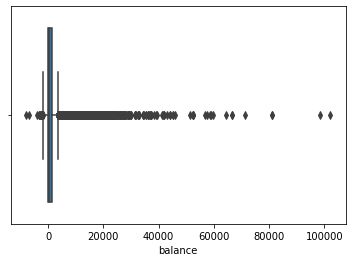

In [37]:
sns.boxplot(df["balance"])

In [38]:
# we will use cbrt transformation here

df.balance=np.cbrt(df.balance)
df.balance

0        12.892606
1         3.072317
2         1.259921
3        11.462385
4         1.000000
           ...    
45206     9.378887
45207    12.002314
45208    17.878816
45209     8.741625
45210    14.375873
Name: balance, Length: 45211, dtype: float64

<AxesSubplot:xlabel='balance'>

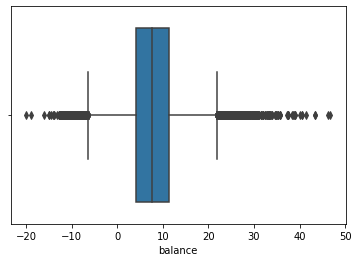

In [39]:
sns.boxplot(df["balance"])

# df["housing"]

In [40]:
df["housing"].unique()

array(['"yes"', '"no"'], dtype=object)

In [41]:
df["housing"].value_counts().to_dict()

{'"yes"': 25130, '"no"': 20081}

In [42]:
df["housing"].replace({'"yes"': 1, '"no"':0},inplace=True)
df["housing"]

0        1
1        1
2        1
3        1
4        0
        ..
45206    0
45207    0
45208    0
45209    0
45210    0
Name: housing, Length: 45211, dtype: int64

# df["loan"]

In [43]:
df["loan"].unique()

array(['"no"', '"yes"'], dtype=object)

In [44]:
df["loan"].value_counts().to_dict()

{'"no"': 37967, '"yes"': 7244}

In [45]:
df["loan"].replace({'"no"': 0, '"yes"': 1},inplace=True)
df["loan"]

0        0
1        0
2        1
3        0
4        0
        ..
45206    0
45207    0
45208    0
45209    0
45210    0
Name: loan, Length: 45211, dtype: int64

# df["contact"]

In [46]:
df["contact"].unique()

array(['"unknown"', '"cellular"', '"telephone"'], dtype=object)

In [47]:
df["contact"].value_counts().to_dict()

{'"cellular"': 29285, '"unknown"': 13020, '"telephone"': 2906}

In [48]:
df["contact"].replace({'"cellular"': 2, '"unknown"': 0, '"telephone"': 1},inplace=True)
df["contact"]

0        0
1        0
2        0
3        0
4        0
        ..
45206    2
45207    2
45208    2
45209    1
45210    2
Name: contact, Length: 45211, dtype: int64

# df["day"]

In [49]:
df["day"].unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31],
      dtype=int64)

<AxesSubplot:xlabel='day'>

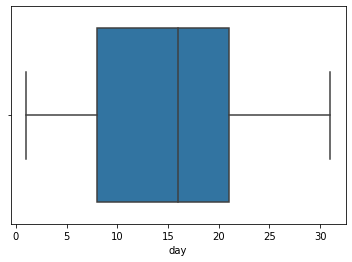

In [50]:
sns.boxplot(df.day)

# df["month"]

In [51]:
df["month"].unique()

array(['"may"', '"jun"', '"jul"', '"aug"', '"oct"', '"nov"', '"dec"',
       '"jan"', '"feb"', '"mar"', '"apr"', '"sep"'], dtype=object)

In [52]:
df["month"].value_counts().to_dict()

{'"may"': 13766,
 '"jul"': 6895,
 '"aug"': 6247,
 '"jun"': 5341,
 '"nov"': 3970,
 '"apr"': 2932,
 '"feb"': 2649,
 '"jan"': 1403,
 '"oct"': 738,
 '"sep"': 579,
 '"mar"': 477,
 '"dec"': 214}

In [53]:
df["month"].replace({'"may"': 5,
 '"jul"': 7,
 '"aug"': 8,
 '"jun"': 6,
 '"nov"': 11,
 '"apr"': 4,
 '"feb"': 2,
 '"jan"': 1,
 '"oct"': 10,
 '"sep"': 9,
 '"mar"': 3,
 '"dec"': 12},inplace=True)
df["month"]

0         5
1         5
2         5
3         5
4         5
         ..
45206    11
45207    11
45208    11
45209    11
45210    11
Name: month, Length: 45211, dtype: int64

# df["duration"]

In [54]:
df["duration"].nunique()

1573

In [55]:
df["duration"].value_counts().to_dict()

{124: 188,
 90: 184,
 89: 177,
 104: 175,
 122: 175,
 114: 175,
 136: 174,
 139: 174,
 112: 174,
 121: 173,
 88: 170,
 119: 170,
 91: 170,
 103: 169,
 123: 168,
 92: 168,
 97: 168,
 113: 166,
 81: 166,
 85: 166,
 111: 166,
 73: 166,
 108: 165,
 125: 165,
 106: 165,
 82: 165,
 80: 164,
 101: 163,
 126: 163,
 87: 163,
 71: 162,
 98: 162,
 150: 161,
 72: 161,
 110: 161,
 102: 160,
 135: 160,
 76: 160,
 166: 159,
 100: 159,
 157: 157,
 151: 157,
 158: 156,
 109: 156,
 95: 156,
 93: 155,
 67: 155,
 96: 155,
 77: 155,
 78: 154,
 128: 154,
 127: 154,
 144: 154,
 140: 153,
 134: 152,
 99: 152,
 143: 151,
 133: 151,
 105: 150,
 117: 150,
 74: 149,
 148: 149,
 94: 149,
 159: 149,
 147: 148,
 129: 147,
 75: 147,
 130: 147,
 65: 146,
 138: 146,
 156: 146,
 160: 145,
 83: 145,
 68: 145,
 131: 144,
 107: 144,
 155: 144,
 86: 144,
 63: 142,
 115: 142,
 153: 141,
 132: 141,
 154: 140,
 145: 140,
 70: 140,
 84: 140,
 168: 140,
 164: 139,
 152: 139,
 185: 139,
 118: 138,
 161: 137,
 149: 136,
 120: 136,

<AxesSubplot:xlabel='duration'>

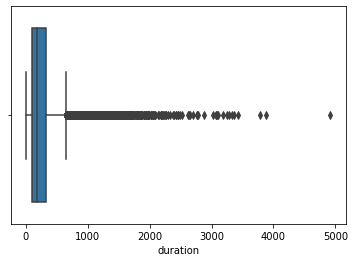

In [56]:
sns.boxplot(df["duration"])

In [57]:
q1=df["duration"].quantile(q=0.25)
q3=df["duration"].quantile(q=0.75)
iqr=q3-q1
uppertail=q3+1.5*iqr
lowertail=q1-1.5*iqr

In [58]:
df["duration"]=df["duration"].apply(hand_out)
df["duration"]

0        261.0
1        151.0
2         76.0
3         92.0
4        198.0
         ...  
45206    643.0
45207    456.0
45208    643.0
45209    508.0
45210    361.0
Name: duration, Length: 45211, dtype: float64

<AxesSubplot:xlabel='duration'>

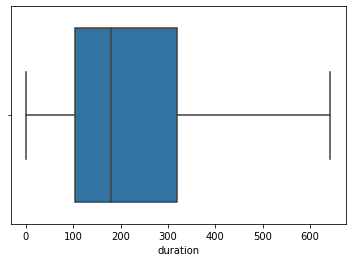

In [59]:
sns.boxplot(df["duration"])

# df["campaign"]

In [60]:
df["campaign"].value_counts()

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: campaign, dtype: int64

<AxesSubplot:xlabel='campaign'>

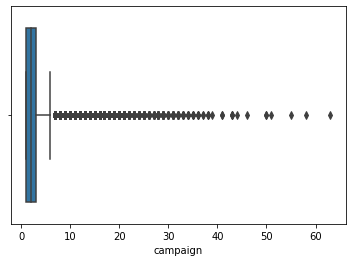

In [61]:
sns.boxplot(df["campaign"])

In [62]:
q1=df["campaign"].quantile(q=0.25)
q3=df["campaign"].quantile(q=0.75)
iqr=q3-q1
uppertail=q3+1.5*iqr
lowertail=q1-1.5*iqr

In [63]:
df["campaign"]=df["campaign"].apply(hand_out)

<AxesSubplot:xlabel='campaign'>

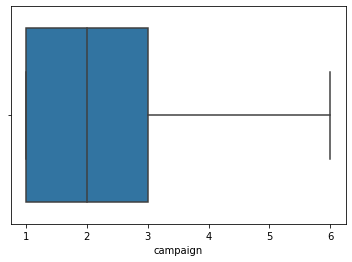

In [64]:
sns.boxplot(df["campaign"])

In [65]:
df["campaign"].value_counts()

1.0    17544
2.0    12505
3.0     5521
6.0     4355
4.0     3522
5.0     1764
Name: campaign, dtype: int64

# df["pdays"]

In [66]:
df["pdays"].nunique()

559

In [67]:
df["pdays"].value_counts().to_dict()

{-1: 36954,
 182: 167,
 92: 147,
 91: 126,
 183: 126,
 181: 117,
 370: 99,
 184: 85,
 364: 77,
 95: 74,
 350: 73,
 94: 72,
 175: 71,
 185: 68,
 93: 65,
 343: 65,
 188: 64,
 186: 60,
 189: 60,
 174: 57,
 349: 57,
 96: 57,
 363: 55,
 90: 54,
 97: 54,
 196: 51,
 365: 51,
 368: 49,
 357: 49,
 98: 49,
 342: 49,
 345: 48,
 351: 48,
 178: 47,
 367: 47,
 347: 47,
 190: 46,
 195: 45,
 356: 45,
 104: 45,
 99: 45,
 180: 45,
 172: 44,
 371: 44,
 344: 44,
 150: 43,
 170: 43,
 87: 43,
 179: 43,
 187: 43,
 169: 42,
 176: 42,
 105: 42,
 167: 42,
 352: 40,
 355: 40,
 360: 38,
 168: 37,
 2: 37,
 272: 37,
 336: 36,
 359: 36,
 358: 35,
 346: 35,
 265: 35,
 102: 35,
 173: 34,
 171: 34,
 361: 33,
 252: 33,
 330: 33,
 369: 33,
 113: 33,
 177: 32,
 85: 32,
 264: 31,
 119: 31,
 301: 31,
 259: 31,
 287: 31,
 332: 31,
 192: 31,
 270: 31,
 337: 30,
 100: 30,
 366: 30,
 89: 30,
 266: 30,
 101: 30,
 258: 30,
 326: 30,
 362: 29,
 111: 29,
 322: 29,
 271: 29,
 274: 29,
 88: 29,
 148: 28,
 191: 28,
 340: 28,
 110: 28,

In [68]:
df["pdays"]=np.cbrt(df["pdays"])

<AxesSubplot:xlabel='pdays'>

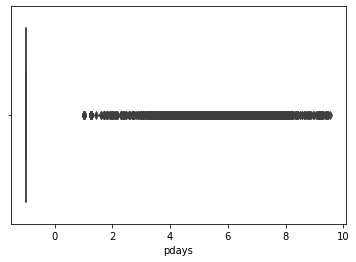

In [69]:
sns.boxplot(df["pdays"])

In [70]:
q1=df["pdays"].quantile(q=0.25)
q3=df["pdays"].quantile(q=0.75)
iqr=q3-q1
lowertail=q1-1.5*iqr

In [71]:
def hand_out_low(data):
    if data<lowertail:
        return lowertail
    else:
        return data

In [72]:
df["pdays"]=df["pdays"].apply(hand_out_low)

<AxesSubplot:xlabel='pdays'>

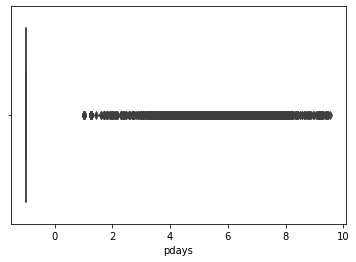

In [73]:
sns.boxplot(df["pdays"])

# df["previous"]

In [74]:
np.mean(df["previous"])

0.5803233726305546

In [75]:
df.describe()

,age,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.868185,0.832275,2.060516,0.018027,7.455923,0.555838,0.160226,1.359758,15.806419,6.144655,234.939307,2.392228,0.253651,0.580323
std,10.394895,0.608230,0.778704,0.133049,6.585777,0.496878,0.366820,0.897951,8.322476,2.408034,176.749932,1.600111,2.699007,2.303441
min,18.000000,0.000000,0.000000,0.000000,-20.015821,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,0.000000,2.000000,0.000000,4.160168,0.000000,0.000000,0.000000,8.000000,5.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,1.000000,2.000000,0.000000,7.651725,1.000000,0.000000,2.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1.000000,3.000000,0.000000,11.260977,1.000000,0.000000,2.000000,21.000000,8.000000,319.000000,3.000000,-1.000000,0.000000
max,70.500000,2.000000,3.000000,1.000000,46.742671,1.000000,1.000000,2.000000,31.000000,12.000000,643.000000,6.000000,9.550059,275.000000


In [76]:
df["previous"].value_counts()

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
20         8
23         8
18         6
22         6
24         5
27         5
21         4
29         4
25         4
30         3
38         2
37         2
26         2
28         2
51         1
275        1
58         1
32         1
40         1
55         1
35         1
41         1
Name: previous, dtype: int64

<AxesSubplot:xlabel='previous'>

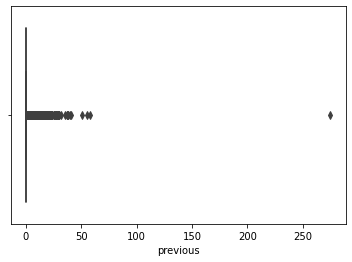

In [77]:
sns.boxplot(df["previous"])

In [78]:
arr=df["previous"].values
np.std(arr)

2.303415570447332

In [79]:
arr=df["previous"].values
np.std(arr)
# zscore method to detect outliers
# z_score=(x-xmean)/std
outliers=[]
def z_score(arr):
    for i in arr:
        z_score=(i-0.580323)/2.303441
        threshold=3
        if z_score>threshold:
            outliers.append(i)
            
    print("outliers >>",outliers)
z_score(arr)

outliers >> [11, 16, 10, 10, 12, 18, 9, 21, 8, 11, 9, 8, 14, 12, 8, 11, 15, 14, 11, 8, 9, 8, 10, 9, 8, 12, 10, 14, 9, 8, 11, 26, 37, 16, 8, 13, 8, 15, 8, 25, 13, 8, 8, 20, 9, 10, 11, 8, 9, 8, 27, 8, 8, 8, 9, 16, 12, 15, 8, 13, 13, 8, 9, 8, 27, 10, 17, 13, 9, 23, 38, 11, 8, 8, 29, 18, 24, 8, 9, 25, 14, 17, 8, 51, 10, 275, 9, 14, 8, 13, 9, 8, 23, 14, 13, 10, 9, 11, 12, 16, 9, 20, 8, 24, 13, 8, 9, 13, 15, 11, 12, 18, 9, 9, 8, 8, 29, 13, 27, 15, 8, 10, 9, 27, 14, 9, 13, 9, 15, 9, 9, 12, 12, 8, 13, 8, 12, 9, 17, 15, 16, 15, 22, 10, 11, 25, 8, 8, 8, 9, 12, 8, 9, 13, 16, 8, 11, 24, 8, 20, 15, 11, 9, 10, 15, 9, 8, 8, 19, 8, 21, 19, 9, 10, 9, 9, 9, 18, 13, 9, 12, 12, 10, 8, 13, 8, 9, 15, 10, 12, 11, 14, 9, 9, 8, 8, 11, 9, 9, 15, 23, 11, 12, 17, 15, 14, 8, 23, 12, 9, 20, 20, 12, 9, 11, 11, 17, 30, 8, 11, 11, 13, 9, 11, 8, 8, 9, 11, 11, 8, 12, 11, 19, 9, 29, 8, 12, 10, 9, 19, 10, 17, 12, 8, 10, 11, 9, 11, 12, 9, 11, 18, 11, 15, 10, 12, 30, 9, 8, 22, 11, 10, 13, 8, 16, 13, 8, 17, 9, 9, 22, 10, 8, 

In [80]:
q1=df["previous"].quantile(q=0.25)
q3=df["previous"].quantile(q=0.75)
iqr=q3-q1
highertail=q3+1.5*iqr

In [81]:
df["previous"]=df["previous"].apply(hand_out)

<AxesSubplot:xlabel='previous'>

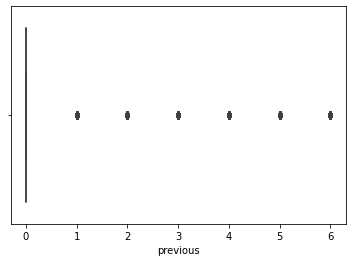

In [82]:
sns.boxplot(df["previous"])

In [83]:
df["previous"].value_counts()

0.0    36954
1.0     2772
2.0     2106
3.0     1142
6.0     1064
4.0      714
5.0      459
Name: previous, dtype: int64

# df["poutcome"]

In [84]:
df["poutcome"].value_counts().to_dict()

{'"unknown"': 36959, '"failure"': 4901, '"other"': 1840, '"success"': 1511}

In [85]:
df["poutcome"].replace({'"unknown"':0, '"failure"':2, '"other"': 1, '"success"': 3},inplace=True)

In [86]:
df["poutcome"].unique()

array([0, 2, 1, 3], dtype=int64)

# df["y"]

In [87]:
df["y"].value_counts().to_dict()

{'"no"': 39922, '"yes"': 5289}

In [88]:
df["y"].replace({'"no"': 0, '"yes"': 1},inplace=True)

In [89]:
df=pd.concat([df,df_job],axis=1)    # concating before feature selection

In [90]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,...,"job_""entrepreneur""","job_""housemaid""","job_""management""","job_""retired""","job_""self-employed""","job_""services""","job_""student""","job_""technician""","job_""unemployed""","job_""unknown"""
0,58.0,"""management""",1,3,0,12.892606,1,0,0,5,...,0,0,1,0,0,0,0,0,0,0
1,44.0,"""technician""",0,2,0,3.072317,1,0,0,5,...,0,0,0,0,0,0,0,1,0,0
2,33.0,"""entrepreneur""",1,2,0,1.259921,1,1,0,5,...,1,0,0,0,0,0,0,0,0,0
3,47.0,"""blue-collar""",1,0,0,11.462385,1,0,0,5,...,0,0,0,0,0,0,0,0,0,0
4,33.0,"""unknown""",0,0,0,1.000000,0,0,0,5,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,"""technician""",1,3,0,9.378887,0,0,2,17,...,0,0,0,0,0,0,0,1,0,0
45207,70.5,"""retired""",2,1,0,12.002314,0,0,2,17,...,0,0,0,1,0,0,0,0,0,0
45208,70.5,"""retired""",1,2,0,17.878816,0,0,2,17,...,0,0,0,1,0,0,0,0,0,0
45209,57.0,"""blue-collar""",1,2,0,8.741625,0,0,1,17,...,0,0,0,0,0,0,0,0,0,0


# feature selection

In [91]:
df.drop("job",axis=1,inplace=True)

In [92]:
x=df.drop("y",axis=1)
y=df["y"]

In [93]:
df.corr(method = 'kendall') # correlation

,age,marital,education,default,balance,housing,loan,contact,day,month,...,"job_""entrepreneur""","job_""housemaid""","job_""management""","job_""retired""","job_""self-employed""","job_""services""","job_""student""","job_""technician""","job_""unemployed""","job_""unknown"""
age,1.000000,0.354624,-0.129618,-0.012156,0.065242,-0.127814,-0.003907,-0.042067,-0.006681,0.084304,...,0.026350,0.073169,-0.009932,0.280986,-0.003545,-0.048831,-0.171681,-0.047986,0.004252,0.040665
marital,0.354624,1.000000,-0.102885,0.005420,-0.015796,0.016421,0.046691,-0.039829,0.004938,0.048972,...,0.039740,0.055163,-0.023405,0.114479,-0.006790,0.004461,-0.182997,-0.043170,-0.003458,0.000174
education,-0.129618,-0.102885,1.000000,-0.010342,0.045667,-0.055316,-0.009730,0.149344,0.019956,0.068847,...,0.047904,-0.106959,0.479879,-0.102459,0.084517,-0.084465,-0.023375,0.053387,-0.022397,-0.069877
default,-0.012156,0.005420,-0.010342,1.000000,-0.137371,-0.006025,0.077234,-0.013291,0.008087,0.017822,...,0.026281,-0.000359,-0.002655,-0.011290,0.004107,0.000068,-0.016222,-0.003089,0.006470,-0.006669
balance,0.065242,-0.015796,0.045667,-0.137371,1.000000,-0.055928,-0.105618,0.027321,0.001242,0.036846,...,-0.008734,-0.000650,0.051741,0.048887,0.014199,-0.039589,0.016532,-0.012831,0.012009,0.016066
housing,-0.127814,0.016421,-0.055316,-0.006025,-0.055928,1.000000,0.041323,-0.173807,-0.022951,-0.230901,...,0.010600,-0.079380,-0.063382,-0.156633,-0.027319,0.070435,-0.085066,-0.012823,-0.048229,-0.075023
loan,-0.003907,0.046691,-0.009730,0.077234,-0.105618,0.041323,1.000000,0.011631,0.010147,0.025957,...,0.039808,-0.017234,-0.038904,-0.014861,-0.007882,0.035575,-0.058503,0.014798,-0.035961,-0.031943
contact,-0.042067,-0.039829,0.149344,-0.013291,0.027321,-0.173807,0.011631,1.000000,0.022262,0.168456,...,-0.003197,-0.009170,0.098973,-0.002304,0.015506,-0.033739,0.033994,0.051305,0.014837,-0.027673
day,-0.006681,0.004938,0.019956,0.008087,0.001242,-0.022951,0.010147,0.022262,1.000000,0.084200,...,-0.000470,0.003602,0.017078,-0.009866,0.005215,-0.005955,-0.014156,0.026889,-0.006140,-0.009470
month,0.084304,0.048972,0.068847,0.017822,0.036846,-0.230901,0.025957,0.168456,0.084200,1.000000,...,0.016979,0.042149,0.079617,0.030313,0.022415,-0.041366,-0.018996,0.047808,-0.031335,0.016679


# model selection

In [94]:
from sklearn.linear_model import LogisticRegression  # parametric alogrithm
from sklearn.neighbors import KNeighborsClassifier   # distance based ,non parametric algorithm
from sklearn.tree import DecisionTreeClassifier      # tree based algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB           # 
from sklearn.svm import SVC

# model splitting

In [95]:
x=df.drop("y",axis=1)
y=df["y"]

# feature scaling

In [96]:
# we use standardization is here bcoz of its robust to outliers

std=StandardScaler()
std_d=std.fit_transform(x)
std_d

array([[ 1.64811715,  0.27576178,  1.20648448, ..., -0.4494137 ,
        -0.17226632, -0.08006853],
       [ 0.30128731, -1.3683719 , -0.07771493, ...,  2.22512133,
        -0.17226632, -0.08006853],
       [-0.75693615,  0.27576178, -0.07771493, ..., -0.4494137 ,
        -0.17226632, -0.08006853],
       ...,
       [ 2.8506438 ,  0.27576178, -0.07771493, ..., -0.4494137 ,
        -0.17226632, -0.08006853],
       [ 1.55191502,  0.27576178, -0.07771493, ..., -0.4494137 ,
        -0.17226632, -0.08006853],
       [-0.37212762,  0.27576178, -0.07771493, ..., -0.4494137 ,
        -0.17226632, -0.08006853]])

In [97]:
std_df=pd.DataFrame(std_d,columns=x.columns)
std_df

,age,marital,education,default,balance,housing,loan,contact,day,month,...,"job_""entrepreneur""","job_""housemaid""","job_""management""","job_""retired""","job_""self-employed""","job_""services""","job_""student""","job_""technician""","job_""unemployed""","job_""unknown"""
0,1.648117,0.275762,1.206484,-0.13549,0.825528,0.893915,-0.436803,-1.514306,-1.298476,-0.475354,...,-0.184415,-0.16793,1.944270,-0.229600,-0.190234,-0.318082,-0.145557,-0.449414,-0.172266,-0.080069
1,0.301287,-1.368372,-0.077715,-0.13549,-0.665625,0.893915,-0.436803,-1.514306,-1.298476,-0.475354,...,-0.184415,-0.16793,-0.514332,-0.229600,-0.190234,-0.318082,-0.145557,2.225121,-0.172266,-0.080069
2,-0.756936,0.275762,-0.077715,-0.13549,-0.940826,0.893915,2.289359,-1.514306,-1.298476,-0.475354,...,5.422561,-0.16793,-0.514332,-0.229600,-0.190234,-0.318082,-0.145557,-0.449414,-0.172266,-0.080069
3,0.589894,0.275762,-2.646114,-0.13549,0.608357,0.893915,-0.436803,-1.514306,-1.298476,-0.475354,...,-0.184415,-0.16793,-0.514332,-0.229600,-0.190234,-0.318082,-0.145557,-0.449414,-0.172266,-0.080069
4,-0.756936,-1.368372,-2.646114,-0.13549,-0.980294,-1.118674,-0.436803,-1.514306,-1.298476,-0.475354,...,-0.184415,-0.16793,-0.514332,-0.229600,-0.190234,-0.318082,-0.145557,-0.449414,-0.172266,12.489301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.974702,0.275762,1.206484,-0.13549,0.291991,-1.118674,-0.436803,0.713012,0.143418,2.016333,...,-0.184415,-0.16793,-0.514332,-0.229600,-0.190234,-0.318082,-0.145557,2.225121,-0.172266,-0.080069
45207,2.850644,1.919895,-1.361914,-0.13549,0.690343,-1.118674,-0.436803,0.713012,0.143418,2.016333,...,-0.184415,-0.16793,-0.514332,4.355402,-0.190234,-0.318082,-0.145557,-0.449414,-0.172266,-0.080069
45208,2.850644,0.275762,-0.077715,-0.13549,1.582654,-1.118674,-0.436803,0.713012,0.143418,2.016333,...,-0.184415,-0.16793,-0.514332,4.355402,-0.190234,-0.318082,-0.145557,-0.449414,-0.172266,-0.080069
45209,1.551915,0.275762,-0.077715,-0.13549,0.195226,-1.118674,-0.436803,-0.400647,0.143418,2.016333,...,-0.184415,-0.16793,-0.514332,-0.229600,-0.190234,-0.318082,-0.145557,-0.449414,-0.172266,-0.080069


# standarized data splittig

In [98]:
x=std_df
y=df["y"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=41)

# model training

# Logistic regression

In [99]:
log_model=LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression()

In [100]:
# prediction and evaluation

#testing data evaluation
print("*"*20,"Testing Data Evaluation","*"*20)

y_pred=log_model.predict(x_test)

cnf=confusion_matrix(y_test,y_pred)
print("confusion matrix :\n",cnf)

clsr=classification_report(y_test,y_pred)
print("classification report :\n",clsr)


#training data evaluation
print("*"*20,"Training Data Evaluation","*"*20)

y_pred_train=log_model.predict(x_train)

cnf=confusion_matrix(y_train,y_pred_train)
print("confusion matrix :\n",cnf)

clsr=classification_report(y_train,y_pred_train)
print("classification report :\n",clsr)

******************** Testing Data Evaluation ********************
confusion matrix :
 [[9600  340]
 [ 926  437]]
classification report :
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      9940
           1       0.56      0.32      0.41      1363

    accuracy                           0.89     11303
   macro avg       0.74      0.64      0.67     11303
weighted avg       0.87      0.89      0.87     11303

******************** Training Data Evaluation ********************
confusion matrix :
 [[29165   817]
 [ 2688  1238]]
classification report :
               precision    recall  f1-score   support

           0       0.92      0.97      0.94     29982
           1       0.60      0.32      0.41      3926

    accuracy                           0.90     33908
   macro avg       0.76      0.64      0.68     33908
weighted avg       0.88      0.90      0.88     33908



# K-Nearest Neighbours classifier

In [101]:
knn_model=KNeighborsClassifier()
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [102]:
# prediction and evaluation

#testing data evaluation
print("*"*20,"Testing Data Evaluation","*"*20)

y_pred=knn_model.predict(x_test)

cnf=confusion_matrix(y_test,y_pred)
print("confusion matrix :\n",cnf)

clsr=classification_report(y_test,y_pred)
print("classification report :\n",clsr)


#training data evaluation
print("*"*20,"Training Data Evaluation","*"*20)

y_pred_train=knn_model.predict(x_train)

cnf=confusion_matrix(y_train,y_pred_train)
print("confusion matrix :\n",cnf)

clsr=classification_report(y_train,y_pred_train)
print("classification report :\n",clsr)

******************** Testing Data Evaluation ********************
confusion matrix :
 [[9601  339]
 [ 964  399]]
classification report :
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      9940
           1       0.54      0.29      0.38      1363

    accuracy                           0.88     11303
   macro avg       0.72      0.63      0.66     11303
weighted avg       0.86      0.88      0.87     11303

******************** Training Data Evaluation ********************
confusion matrix :
 [[29429   553]
 [ 2203  1723]]
classification report :
               precision    recall  f1-score   support

           0       0.93      0.98      0.96     29982
           1       0.76      0.44      0.56      3926

    accuracy                           0.92     33908
   macro avg       0.84      0.71      0.76     33908
weighted avg       0.91      0.92      0.91     33908



# Normal Dataset splitting

In [103]:
x=df.drop("y",axis=1)
y=df['y']

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=41,test_size=0.25)

# Decesion Tree

In [115]:
dcs_model=DecisionTreeClassifier()
dcs_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [116]:
# prediction and evaluation

#testing data evaluation
print("*"*20,"Testing Data Evaluation","*"*20)

y_pred=dcs_model.predict(x_test)

cnf=confusion_matrix(y_test,y_pred)
print("confusion matrix :\n",cnf)

clsr=classification_report(y_test,y_pred)
print("classification report :\n",clsr)


#training data evaluation
print("*"*20,"Training Data Evaluation","*"*20)

y_pred_train=dcs_model.predict(x_train)

cnf=confusion_matrix(y_train,y_pred_train)
print("confusion matrix :\n",cnf)

clsr=classification_report(y_train,y_pred_train)
print("classification report :\n",clsr)

******************** Testing Data Evaluation ********************
confusion matrix :
 [[9195  745]
 [ 713  650]]
classification report :
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      9940
           1       0.47      0.48      0.47      1363

    accuracy                           0.87     11303
   macro avg       0.70      0.70      0.70     11303
weighted avg       0.87      0.87      0.87     11303

******************** Training Data Evaluation ********************
confusion matrix :
 [[29982     0]
 [    0  3926]]
classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     29982
           1       1.00      1.00      1.00      3926

    accuracy                           1.00     33908
   macro avg       1.00      1.00      1.00     33908
weighted avg       1.00      1.00      1.00     33908



## hyperparameter tunning

In [117]:
dt_model=DecisionTreeClassifier()

hyp={"criterion":["gini","entorpy"],
    "max_depth":np.arange(2,20),
    "min_samples_leaf":np.arange(2,10),
    "min_samples_split":np.arange(2,15)}

gscv_dcs_model=GridSearchCV(dt_model,hyp,cv=5)
gscv_dcs_model.fit(x_train,y_train)

KeyboardInterrupt: 

In [ ]:
gscv_dcs_model.best_estimator_

### after hyperparamter tunning

In [ ]:
dcs_model1=gscv_dcs_model.best_estimator_
dcs_model1.fit(x_train,y_train)

In [ ]:
# prediction and evaluation

#testing data evaluation
print("*"*20,"Testing Data Evaluation","*"*20)

y_pred=dcs_model1.predict(x_test)

cnf=confusion_matrix(y_test,y_pred)
print("confusion matrix :\n",cnf)

clsr=classification_report(y_test,y_pred)
print("classification report :\n",clsr)


#training data evaluation
print("*"*20,"Training Data Evaluation","*"*20)

y_pred_train=dcs_model1.predict(x_train)

cnf=confusion_matrix(y_train,y_pred_train)
print("confusion matrix :\n",cnf)

clsr=classification_report(y_train,y_pred_train)
print("classification report :\n",clsr)

# random forest

In [118]:
rnd_model=RandomForestClassifier()
rnd_model.fit(x_train,y_train)

RandomForestClassifier()

In [119]:
# prediction and evaluation

#testing data evaluation
print("*"*20,"Testing Data Evaluation","*"*20)

y_pred=rnd_model.predict(x_test)

cnf=confusion_matrix(y_test,y_pred)
print("confusion matrix :\n",cnf)

clsr=classification_report(y_test,y_pred)
print("classification report :\n",clsr)


#training data evaluation
print("*"*20,"Training Data Evaluation","*"*20)

y_pred_train=rnd_model.predict(x_train)

cnf=confusion_matrix(y_train,y_pred_train)
print("confusion matrix :\n",cnf)

clsr=classification_report(y_train,y_pred_train)
print("classification report :\n",clsr)

******************** Testing Data Evaluation ********************
confusion matrix :
 [[9615  325]
 [ 850  513]]
classification report :
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      9940
           1       0.61      0.38      0.47      1363

    accuracy                           0.90     11303
   macro avg       0.77      0.67      0.70     11303
weighted avg       0.88      0.90      0.88     11303

******************** Training Data Evaluation ********************
confusion matrix :
 [[29982     0]
 [    0  3926]]
classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     29982
           1       1.00      1.00      1.00      3926

    accuracy                           1.00     33908
   macro avg       1.00      1.00      1.00     33908
weighted avg       1.00      1.00      1.00     33908



### hyperparameter tunning

In [138]:
rd_model=RandomForestClassifier()

hyp={"n_estimators":np.arange(10,200,2),
    "criterion":["gini","entropy"],
    "min_samples_split":np.arange(2,20),
    "min_samples_leaf":np.arange(2,10),
    "max_depth":np.arange(2,13)}

rnd_rd_model=RandomizedSearchCV(rd_model,hyp,cv=5)
rnd_rd_model.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'n_estimators': array([ 10,  12,  14,  16,  18,  20,  22,  24,  26,  28,  30,  32,  34,
        36,  38,  40,  42,  44,  46,  48,  50,  52,  54,  56,  58,  60,
        62,  64,  66,  68,  70,  72,  74,  76,  78,  80,  82,  84,  86,
        88,  90,  92,  94,  96,  98, 100, 102, 104, 106, 108, 110, 112,
       114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136, 138,
       140, 142, 144, 146, 148, 150, 152, 154, 156, 158, 160, 162, 164,
       166, 168, 170, 172, 17

In [140]:
rnd_rd_model.best_estimator_

RandomForestClassifier(max_depth=12, min_samples_leaf=9, n_estimators=104)

### after hyperparameter tunning

In [141]:
rnd_model1=rnd_rd_model.best_estimator_
rnd_model.fit(x_train,y_train)

RandomForestClassifier()

In [142]:
# prediction and evaluation

#testing data evaluation
print("*"*20,"Testing Data Evaluation","*"*20)

y_pred=rnd_model1.predict(x_test)

cnf=confusion_matrix(y_test,y_pred)
print("confusion matrix :\n",cnf)

clsr=classification_report(y_test,y_pred)
print("classification report :\n",clsr)


#training data evaluation
print("*"*20,"Training Data Evaluation","*"*20)

y_pred_train=rnd_model1.predict(x_train)

cnf=confusion_matrix(y_train,y_pred_train)
print("confusion matrix :\n",cnf)

clsr=classification_report(y_train,y_pred_train)
print("classification report :\n",clsr)

******************** Testing Data Evaluation ********************
confusion matrix :
 [[9773  167]
 [1026  337]]
classification report :
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      9940
           1       0.67      0.25      0.36      1363

    accuracy                           0.89     11303
   macro avg       0.79      0.62      0.65     11303
weighted avg       0.88      0.89      0.87     11303

******************** Training Data Evaluation ********************
confusion matrix :
 [[29749   233]
 [ 2603  1323]]
classification report :
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     29982
           1       0.85      0.34      0.48      3926

    accuracy                           0.92     33908
   macro avg       0.88      0.66      0.72     33908
weighted avg       0.91      0.92      0.90     33908



In [15]:
#f1 score                               #0th class
(2*0.92*0.99)/(0.92+0.99)

0.9537172774869109

In [16]:
#f1 score                               #1 th class
(2*0.85*0.34)/(0.85+0.34)

0.4857142857142858

In [8]:
weighted_avg=(29982*0.92+3926*0.85)/(29982+3926)    # precesion
weighted_avg
29749+233

29982

In [9]:
weighted=(29982*0.99+3926*0.34)/(29982+3926) 
weighted

0.9147404742243719

In [11]:
macro_avg=(0.99+0.34)/2
macro_avg

0.665

In [ ]:
macro_avg=(0.92+0.85)/2
macro_avg

# ada_boost

In [115]:
ada_model=AdaBoostClassifier()
ada_model.fit(x_train,y_train)

AdaBoostClassifier()

In [116]:
# prediction and evaluation

#testing data evaluation
print("*"*20,"Testing Data Evaluation","*"*20)

y_pred=ada_model.predict(x_test)

cnf=confusion_matrix(y_test,y_pred)
print("confusion matrix :\n",cnf)

clsr=classification_report(y_test,y_pred)
print("classification report :\n",clsr)


#training data evaluation
print("*"*20,"Training Data Evaluation","*"*20)

y_pred_train=ada_model.predict(x_train)

cnf=confusion_matrix(y_train,y_pred_train)
print("confusion matrix :\n",cnf)

clsr=classification_report(y_train,y_pred_train)
print("classification report :\n",clsr)

******************** Testing Data Evaluation ********************
confusion matrix :
 [[9575  365]
 [ 856  507]]
classification report :
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      9940
           1       0.58      0.37      0.45      1363

    accuracy                           0.89     11303
   macro avg       0.75      0.67      0.70     11303
weighted avg       0.88      0.89      0.88     11303

******************** Training Data Evaluation ********************
confusion matrix :
 [[29106   876]
 [ 2486  1440]]
classification report :
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     29982
           1       0.62      0.37      0.46      3926

    accuracy                           0.90     33908
   macro avg       0.77      0.67      0.70     33908
weighted avg       0.89      0.90      0.89     33908



### hyperparameter tunning

In [147]:
ad_model=AdaBoostClassifier()
hyp={"n_estimators":np.arange(10,200),
    "random_state":np.arange(1,50)}

gd_ad_model=RandomizedSearchCV(ad_model,hyp,cv=5)
gd_ad_model.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(),
                   param_distributions={'n_estimators': array([ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,
        23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,
        36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
        49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
        62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,
        75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  93,...
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191,
       192, 193, 194, 195, 196, 197, 198, 199]),
                                        'random_state': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 

In [148]:
gd_ad_model.best_estimator_

AdaBoostClassifier(n_estimators=189, random_state=31)

### after Hyperparameter Tunning

In [151]:
ada_model1=gd_ad_model.best_estimator_
ada_model1.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=189, random_state=31)

In [152]:
# prediction and evaluation

#testing data evaluation
print("*"*20,"Testing Data Evaluation","*"*20)

y_pred=ada_model1.predict(x_test)

cnf=confusion_matrix(y_test,y_pred)
print("confusion matrix :\n",cnf)

clsr=classification_report(y_test,y_pred)
print("classification report :\n",clsr)


#training data evaluation
print("*"*20,"Training Data Evaluation","*"*20)

y_pred_train=ada_model1.predict(x_train)

cnf=confusion_matrix(y_train,y_pred_train)
print("confusion matrix :\n",cnf)

clsr=classification_report(y_train,y_pred_train)
print("classification report :\n",clsr)

******************** Testing Data Evaluation ********************
confusion matrix :
 [[9597  343]
 [ 853  510]]
classification report :
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      9940
           1       0.60      0.37      0.46      1363

    accuracy                           0.89     11303
   macro avg       0.76      0.67      0.70     11303
weighted avg       0.88      0.89      0.88     11303

******************** Training Data Evaluation ********************
confusion matrix :
 [[29141   841]
 [ 2413  1513]]
classification report :
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     29982
           1       0.64      0.39      0.48      3926

    accuracy                           0.90     33908
   macro avg       0.78      0.68      0.71     33908
weighted avg       0.89      0.90      0.89     33908



# Naive-bayes

In [111]:
nvb_model=GaussianNB()
nvb_model.fit(x_train,y_train)

GaussianNB()

In [143]:
# prediction and evaluation

#testing data evaluation
print("*"*20,"Testing Data Evaluation","*"*20)

y_pred=nvb_model.predict(x_test)

cnf=confusion_matrix(y_test,y_pred)
print("confusion matrix :\n",cnf)

clsr=classification_report(y_test,y_pred)
print("classification report :\n",clsr)


#training data evaluation
print("*"*20,"Training Data Evaluation","*"*20)

y_pred_train=nvb_model.predict(x_train)

cnf=confusion_matrix(y_train,y_pred_train)
print("confusion matrix :\n",cnf)

clsr=classification_report(y_train,y_pred_train)
print("classification report :\n",clsr)

******************** Testing Data Evaluation ********************
confusion matrix :
 [[8223 1717]
 [ 659  704]]
classification report :
               precision    recall  f1-score   support

           0       0.93      0.83      0.87      9940
           1       0.29      0.52      0.37      1363

    accuracy                           0.79     11303
   macro avg       0.61      0.67      0.62     11303
weighted avg       0.85      0.79      0.81     11303

******************** Training Data Evaluation ********************
confusion matrix :
 [[25030  4952]
 [ 1924  2002]]
classification report :
               precision    recall  f1-score   support

           0       0.93      0.83      0.88     29982
           1       0.29      0.51      0.37      3926

    accuracy                           0.80     33908
   macro avg       0.61      0.67      0.62     33908
weighted avg       0.85      0.80      0.82     33908



# SVM

In [113]:
svm_model=SVC()
svm_model.fit(x_train,y_train)

SVC()

In [114]:
# prediction and evaluation

#testing data evaluation
print("*"*20,"Testing Data Evaluation","*"*20)

y_pred=svm_model.predict(x_test)

cnf=confusion_matrix(y_test,y_pred)
print("confusion matrix :\n",cnf)

clsr=classification_report(y_test,y_pred)
print("classification report :\n",clsr)


#training data evaluation
print("*"*20,"Training Data Evaluation","*"*20)

y_pred_train=svm_model.predict(x_train)

cnf=confusion_matrix(y_train,y_pred_train)
print("confusion matrix :\n",cnf)

clsr=classification_report(y_train,y_pred_train)
print("classification report :\n",clsr)

******************** Testing Data Evaluation ********************
confusion matrix :
 [[9940    0]
 [1363    0]]
classification report :
               precision    recall  f1-score   support

           0       0.88      1.00      0.94      9940
           1       0.00      0.00      0.00      1363

    accuracy                           0.88     11303
   macro avg       0.44      0.50      0.47     11303
weighted avg       0.77      0.88      0.82     11303

******************** Training Data Evaluation ********************
confusion matrix :
 [[29982     0]
 [ 3926     0]]
classification report :
               precision    recall  f1-score   support

           0       0.88      1.00      0.94     29982
           1       0.00      0.00      0.00      3926

    accuracy                           0.88     33908
   macro avg       0.44      0.50      0.47     33908
weighted avg       0.78      0.88      0.83     33908



In [18]:
(29982 +0)/(29982 +0+0+3926)

0.8842161141913413

## we will prefer random forest bcoz it will give us good accuracy,precesion and recall

In [120]:
pickle.dump(rnd_model,open("bank_model.pkl","wb"))

In [106]:
pickle.dump(x.columns,open("columns.pkl","wb"))

In [227]:
model = pickle.load (open("D:\VELOCITY_Class\practice datasets\\bank\\artifacts\\bank_model.pkl","rb"))


RandomForestClassifier(max_features='auto')

In [234]:
model = pickle.load (open("D:\VELOCITY_Class\practice datasets\\bank\\artifacts\\bank_model.pkl","rb"))
columns = pickle.load(open("d:\VELOCITY_Class\practice datasets\\bank\\artifacts\\columns.pkl","rb"))

Index(['age', 'marital', 'education', 'default', 'balance', 'housing', 'loan',
       'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'job_"admin."', 'job_"blue-collar"', 'job_"entrepreneur"',
       'job_"housemaid"', 'job_"management"', 'job_"retired"',
       'job_"self-employed"', 'job_"services"', 'job_"student"',
       'job_"technician"', 'job_"unemployed"', 'job_"unknown"'],
      dtype='object')

In [241]:
x.columns[15]

'job_"admin."'

In [242]:
x.shape

(45211, 27)

In [243]:
np.zeros(254)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [254]:
x["poutcome"].value_counts()

0    36959
2     4901
1     1840
3     1511
Name: poutcome, dtype: int64